In [13]:
%pylab inline  
import os
import sys
import cv2
import numpy as np

image = cv2.imread("Image1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # color convert because opencv uses RGB (red,green,blue) to order colors to screen
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #is this because it requires grayscale?


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gray']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# kps: 1488, descriptors: (1488, 128)


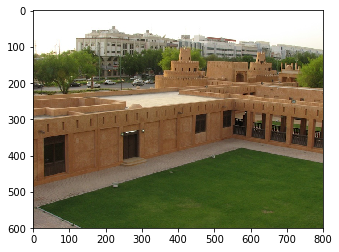

In [14]:
#SIFT
sift = cv2.xfeatures2d.SIFT_create()
(kps, descs) = sift.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))
imshow(image)

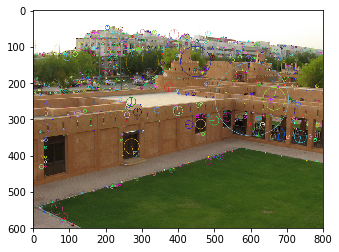

In [3]:
# Paint the key points over the original image
#SIFT result
result = cv2.drawKeypoints(image, kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imshow(result)

In [4]:
surf = cv2.xfeatures2d.SURF_create()
(kps, descs) = surf.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

# kps: 2583, descriptors: (2583, 64)


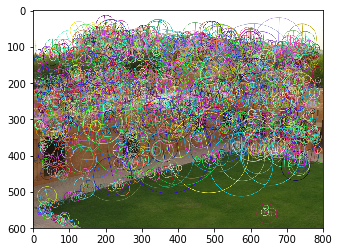

In [5]:
# Paint the key points over the original image
#SURF result -- did it work or w/ the error above am i just seeing prev image?
result = cv2.drawKeypoints(image, kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imshow(result)

In [6]:
# Detect the CenSurE key points
star = cv2.xfeatures2d.StarDetector_create()
kps = star.detect(gray, None)
# Create the BRIEF extractor and compute the descriptors
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
kps, descs = brief.compute(image, kps)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))


# kps: 266, descriptors: (266, 32)


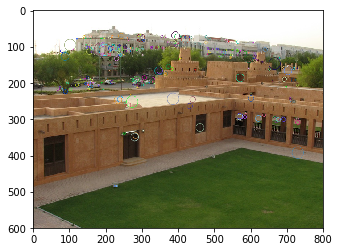

In [7]:
#BRIEF results?
result = cv2.drawKeypoints(image, kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imshow(result)

In [8]:
orb = cv2.ORB_create()
(kps, descs) = orb.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

# kps: 500, descriptors: (500, 32)


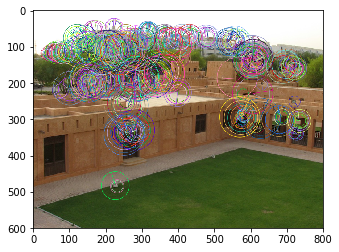

In [9]:
#ORB results
result = cv2.drawKeypoints(image, kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imshow(result)

In [10]:
fast = cv2.FastFeatureDetector()
kps = fast.detect(image,None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

TypeError: Incorrect type of self (must be 'Feature2D' or its derivative)

# kps: 500, descriptors: (500, 32)


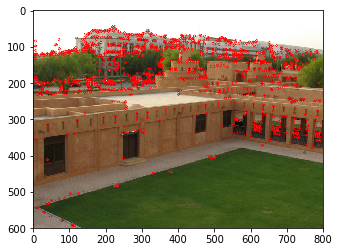

In [11]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create(threshold=25)

# find and draw the keypoints
kp = fast.detect(image,None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))
image = cv2.drawKeypoints(image, kp, None,color=(255,0,0))
imshow(image)